## ¿What is Dimensionality Reduction?

A lot of Machine Learning problems consists of hundreds to thousands of features. Having such a large number of
features poses certain problems.

This problem is also sometimes termed as The Curse of Dimensionality and Dimensionality Reduction or 
Dimension reduction is the process of reducing the number of random variables under consideration by obtaining
a set of principal variables.

In other words, the goal is to take something that is very high dimensional and get it down to something
that is easier to work with, without losing much of the information.

![img](../img/r-r.png)

## ¿Why Dimensionality Reduction?

+ We are living in a time where the connections between the different devices have increased because they have more sensors and measuring technologies that control some actions. That makes the features we should analyse bigger every time and more unintelligible.

+ These techniques helps us to reduce the quantity of relevant information that we should save so they reduce a lot the storage costs.

+ Large dimensions are difficult to train on, need more computational power and time.

+ In most datasets we find a high quantity or repeated data, columns that have just one value or which variance is so small that are not able to give the needed information for the model learning. The reduction of dimensionality helps us to filter this unnecessary information.

+ One of the most important things is the human eye. We do not have the same capabilities as a machine so it's necessary to adapt the data to be understood through our senses. This algorithm makes it easier to plot in two or three dimensions our data distribution.

+ Multicollinearity. The detection of the redundant information is important to delete the unnecessary one. It happens many times that you can find variables represented in different units of measure (Example: m and cm). These variables with such strong correlation are not useful for model efficiency and model learning. 

## Real Dimension vs Apparent Dimension

+ Real dimension of data generally does not equal to apparent dimension of our dataset.
+ Degrees of freedom and restrictions

![img](../img/real-apparent.png)

## Projection vs Manifold Learning

Projection : This technique deals with projecting every data point which is in high dimension, onto a subspace
    suitable lower-dimensional space in a way which approximately preserves the distances between the points.
    For instance the figure below, the points in 3D are projected onto a 2D plane. This is a lower-dimensional (2D)
    subspace of the high-dimensional (3D) space and the axes correspond to new features z1 and z2 (the coordinates
    of the projections on the plane).

![img](../img/projection.png)

Manifold Learning : Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this
    task are based on the idea that the dimensionality of many data sets is only artificially high.
    
![img](../img/manifold.png)

### Linear vs Nonlinear

Linear subspaces may be inefficient for some datasets. If the data is embedded on a manifold, we should capture the structure(unfolding)

![img](../img/linear-vs-nonlinear.png)


## PCA - Principal Component Analysis
The idea behind PCA is very simple:
 + Identify a Hyperplane that lies closest to the data 
 + Project the data onto the hyperplane.
 
### Variance
![img](../img/varianza.png) 

### Variance visualization 
![img](../img/varianza2.png)

### Variance maximization
![img](../img/argmaxvarianza.png)
    
PCA is a variance maximizer. It projects the original data onto the directions where variance is maximum.

![img](../img/pca1.gif)

In this technique, variables are transformed into a new set of variables, which are linear combination of original 
variables. These new set of variables are known as principle components.

They are obtained in such a way that first principle component accounts for most of the possible variation of 
original data after which each succeeding component has the highest possible variance.

## Principal Component
The axis that explains the maximum amount of variance int he training set is called the principal components.
The axis othogonal to this axis is called the second principal component.
Thus in 2D, there will be 2 principal components. However, for a higher dimensions, PCA would find a third component
orthogonal to the other two components and so on.

# Implementing PCA

To check what libraries are installed:

In [1]:
!pip freeze

alembic @ file:///home/conda/feedstock_root/build_artifacts/alembic_1620372817186/work
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1620700927854/work/dist
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1610522573621/work
async-generator==1.10
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1620387926260/work
Babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1619719576210/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1601745390275/work
bleach @ file:///home/conda/feedstock_root/build_artifacts/bleach_1612213472466/work
blinker==1.4
bokeh @ file:///home/conda/feedstock

The common libraries for developing a Machine Learning solution are:
Numpy, Pandas, Matplotlib, Seaborn and Scikit-learn. Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

https://numpy.org/

https://pandas.pydata.org/

https://matplotlib.org/

https://seaborn.pydata.org/

https://scikit-learn.org/

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn

from PIL import Image

In [2]:
# Set the random seed to get reproducible results
from numpy.random import seed
seed(22)

### Datasets

For the PCA experiments, the selected dataset will be the Kannada MNIST. Kannada is a language spoken predominantly by people of Karnataka in southwestern India. The language has roughly 45 million native speakers and is written using the Kannada script.
(https://en.wikipedia.org/wiki/Kannada)

![img](../img/kannada.png)

In [3]:
train = pd.read_csv('../data/Kannada-MNIST/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Check the shape of the input data:")
train.shape

Check the shape of the input data:


(60000, 785)

In [5]:
Y_train = train.label.values
X_train = train.loc[:,'pixel0':].values

Let´s take a look to the samples

In [6]:
first_sample = X_train[0]
print("Check the shape of the first image:")
print(first_sample.shape)

Check the shape of the first image:
(784,)


In [7]:
first_sample = first_sample.reshape(28, 28)
print(first_sample)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  21 234 255 255 149
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  21 234 255 255 231
  148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  40 167 247 255 255 255
  191   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  50 154 255 255 16

In [8]:
Image.fromarray(first_sample.astype(np.uint8))

In [9]:
second_sample = X_train[2].reshape(28, 28)
Image.fromarray((second_sample).astype(np.uint8))

In [10]:
# Summary of elements for each class in the training and the testing datasets
print("Number of elements for each Training instance")
np.unique(Y_train, return_counts=True)

Number of elements for each Training instance


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

### Standarize data
When developing a Machine Learning solution, the data has to be prepared properly. Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. All this because, we would want all the scale of measurements to be treated on the same scale.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [12]:
# Import function from Sklearn
from sklearn.preprocessing import StandardScaler

In [13]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(X_train)
print(standardized_data.shape)

(60000, 784)


In [14]:
# Importing PCA function from Sklearn
from sklearn.decomposition import PCA

In [15]:
## Applying PCA

pca = PCA(n_components=2) # project from 784 to 2 dimensions

principalComponents = pca.fit_transform(X_train)

principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principal_df.shape

(60000, 2)

![img](../img/pca2.png)

In [16]:
# Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.07972071 0.05570993]


![img](../img/inbox_3363440_4ab5a1b815eff3810b6bc32b4bb23e70_Capture2.png)

Text(0, 0.5, 'Principal Component 2')

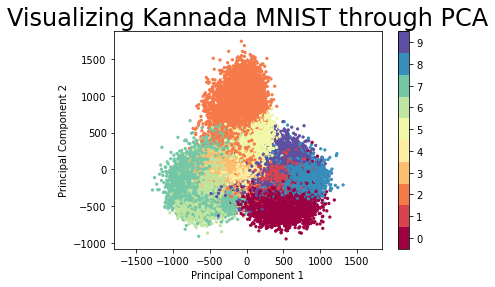

In [17]:
# Plot the first two principal components of each point to learn about the data:

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=Y_train, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

The full data is a 784-dimensional point cloud, and these colored points are the projection of each data point
along the directions with the largest variance.

This representation makes it possible for us to see the layout of the digits in two dimensions. Another important
thing to note here is that we have achieved this in an unsupervised manner—that is, without reference to the labels.

In [18]:
## Using 3 Principal Components

pca = PCA(n_components=3) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df.shape

(60000, 3)

### Plot 3D

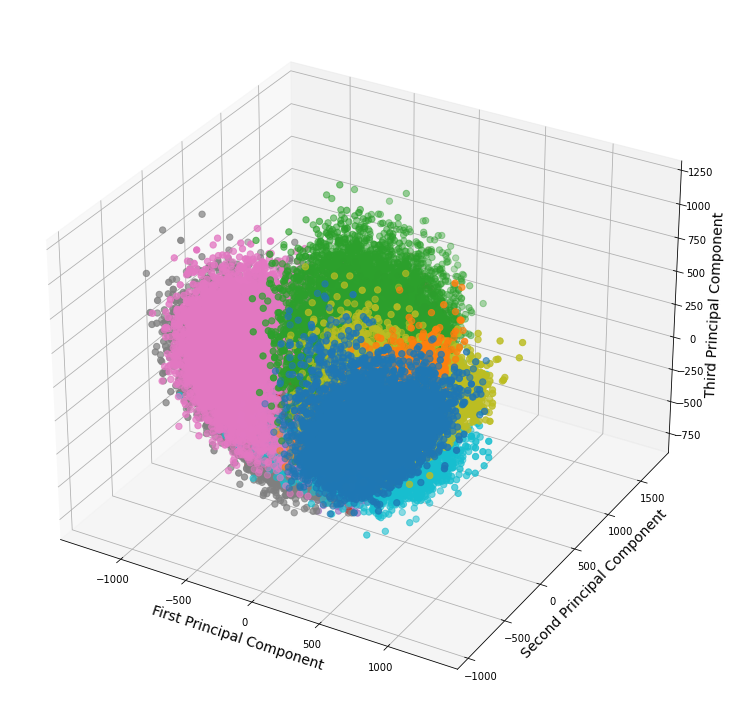

In [19]:
Xax = principalComponents[:,0]
Yax = principalComponents[:,1]
Zax = principalComponents[:,2]

fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(Y_train):
 ix=np.where(Y_train==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], s=40)
    
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

plt.show()

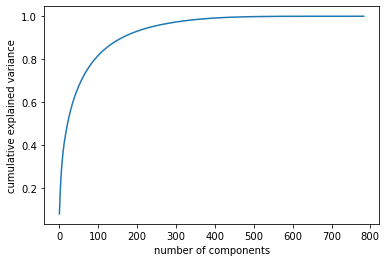

In [20]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');